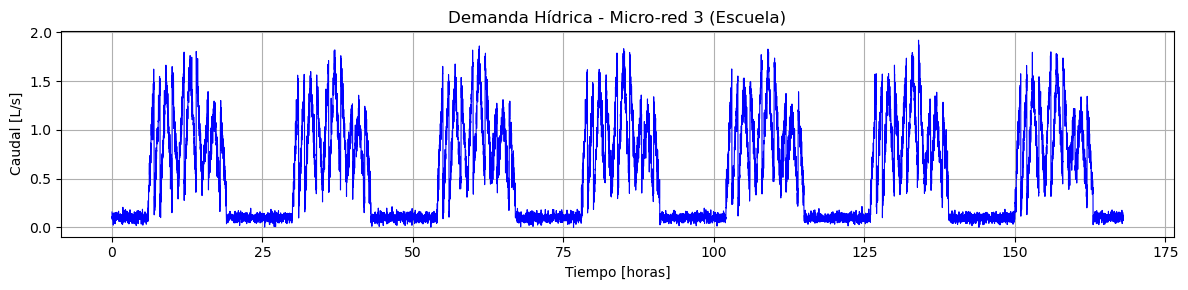

In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# === 1. Parámetros de simulación ===
Ts = 60  # Tiempo de muestreo: 60 segundos (1 minuto)
Tsim = 7 * 24 * 3600  # 7 días en segundos
Nt = Tsim // Ts       # Número total de muestras
t = np.arange(Nt) * Ts / 3600  # tiempo en horas (para graficar)

# === 2. Inicialización de vector de demanda hídrica ===
Q_dem = np.zeros(Nt)

# === 3. Generar perfil horario por cada día ===
for day in range(7):
    for h in range(24):
        idx = (day * 24 + h) * 60  # índice inicial de esta hora

        # Patrón horario con transiciones suaves y algo de ruido
        if 6 <= h < 9:        # Inicio de jornada
            val = np.linspace(0.2, 1.5, 60) + np.random.normal(0, 0.1, 60)
        elif 9 <= h < 11:     # Clases matinales bajando
            val = np.linspace(1.5, 0.4, 60) + np.random.normal(0, 0.1, 60)
        elif 11 <= h < 13:    # Colación y uso de baños
            val = np.linspace(0.4, 1.7, 60) + np.random.normal(0, 0.1, 60)
        elif 13 <= h < 15:    # Clases tarde bajando
            val = np.linspace(1.7, 0.5, 60) + np.random.normal(0, 0.1, 60)
        elif 15 <= h < 17:    # Actividad final / limpieza
            val = np.linspace(0.5, 1.2, 60) + np.random.normal(0, 0.1, 60)
        elif 17 <= h < 19:    # Cierre de jornada
            val = np.linspace(1.2, 0.3, 60) + np.random.normal(0, 0.1, 60)
        else:                 # Horario nocturno
            val = np.random.normal(0.1, 0.03, 60)

        # Limitar a rango físico [0, 2.5 L/s]
        Q_dem[idx:idx+60] = np.clip(val, 0, 2.5)

# === 4. Guardar archivo .mat para usar en MATLAB ===
sio.savemat("Q_dem_escuela_replicado.mat", {"Q_dem": Q_dem})

# === 5. Visualización de los 7 días ===
plt.figure(figsize=(12, 3))
plt.plot(t, Q_dem, 'b-', linewidth=0.8)
plt.ylabel('Caudal [L/s]')
plt.xlabel('Tiempo [horas]')
plt.title('Demanda Hídrica - Micro-red 3 (Escuela)')
plt.grid(True)
plt.tight_layout()
plt.show()
